# Anemia Prediction

Anemia or anaemia (British English) is a blood disorder in which the blood has a reduced ability to carry oxygen due to a lower than normal number of red blood cells, or a reduction in the amount of haemoglobin [*](https://en.wikipedia.org/wiki/Anemia).

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
sb.set_theme(style='whitegrid')

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Linear Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# Non-linear Algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Metrics to evaluate performance
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


## Load Dataset

In [2]:
df = pd.read_csv('Data/anemia.csv')
df.head()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,1,14.9,22.7,29.1,83.7,0
1,0,15.9,25.4,28.3,72.0,0
2,0,9.0,21.5,29.6,71.2,1
3,0,14.9,16.0,31.4,87.5,0
4,1,14.7,22.0,28.2,99.5,0


In [4]:
df.isnull().sum()

Gender        0
Hemoglobin    0
MCH           0
MCHC          0
MCV           0
Result        0
dtype: int64

In [8]:
# Description
pd.set_option('display.precision', 1)
df.describe(include='all')

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
count,1421.0,1421.0,1421.0,1421.0,1421.0,1421.0
mean,0.5,13.4,22.9,30.3,85.5,0.4
std,0.5,2.0,4.0,1.4,9.6,0.5
min,0.0,6.6,16.0,27.8,69.4,0.0
25%,0.0,11.7,19.4,29.0,77.3,0.0
50%,1.0,13.2,22.7,30.4,85.3,0.0
75%,1.0,15.0,26.2,31.4,94.2,1.0
max,1.0,16.9,30.0,32.5,101.6,1.0


In [6]:
df.dtypes

Gender          int64
Hemoglobin    float64
MCH           float64
MCHC          float64
MCV           float64
Result          int64
dtype: object

In [40]:
# Convert Gender and Result into objects
df[['Gender', 'Result']] = df[['Gender', 'Result']].astype('category')
cat_features = ['Gender', 'Result'] # Categorical columns(features)
nbr_features = df.columns.drop(cat_features) # Numerical columns(features)
df.dtypes

Gender        category
Hemoglobin     float64
MCH            float64
MCHC           float64
MCV            float64
Result        category
dtype: object

In [26]:
# Description
pd.set_option('display.precision', 1)
df.describe(include='all')

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
count,1421.0,1421.0,1421.0,1421.0,1421.0,1421.0
unique,2.0,NaN,NaN,NaN,NaN,2.0
top,1.0,NaN,NaN,NaN,NaN,0.0
freq,740.0,NaN,NaN,NaN,NaN,801.0
mean,NaN,13.4,22.9,30.3,85.5,NaN
std,NaN,2.0,4.0,1.4,9.6,NaN
min,NaN,6.6,16.0,27.8,69.4,NaN
25%,NaN,11.7,19.4,29.0,77.3,NaN
50%,NaN,13.2,22.7,30.4,85.3,NaN
75%,NaN,15.0,26.2,31.4,94.2,NaN


<AxesSubplot:xlabel='Result', ylabel='count'>

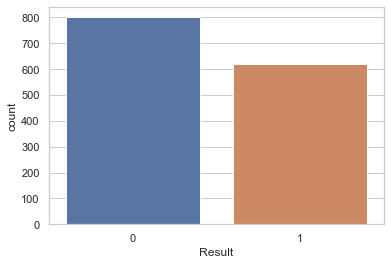

In [33]:
# Check if the dataset is balanced
sb.countplot(x=df['Result'])

<AxesSubplot:xlabel='Result', ylabel='count'>

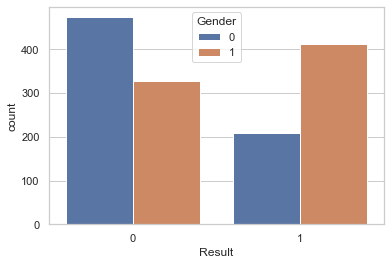

In [34]:
sb.countplot(x=df['Result'], hue=df['Gender'])

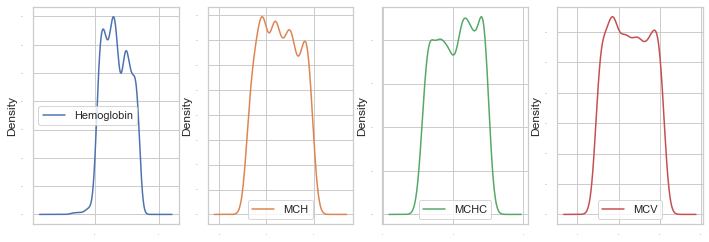

In [44]:
df[nbr_features].plot(kind='density', subplots=True, layout=(1,4), sharex=False, legend=True, 
                                            fontsize=1, figsize=(12,4))
plt.show()

Numeric feartures almost follows normal distribution.

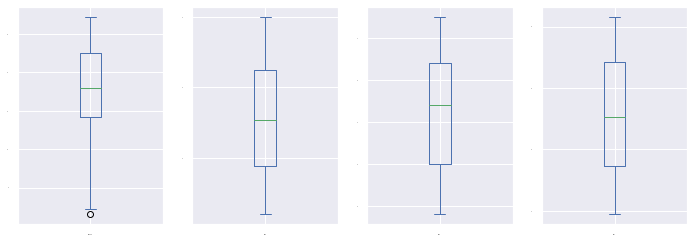

In [106]:
df[nbr_features].plot(kind='box', subplots=True, layout=(1,4), sharex=False, legend=True,
                     fontsize=1, figsize=(12,4))
plt.show()

We see almost no outliers so no need to remove any data point.

/var/folders/xm/3h6hfxmn0158s2wvp_w5r6700000gn/T/ipykernel_92710/1963808080.py:6: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(cax)


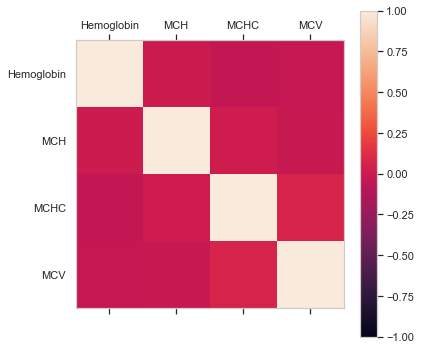

In [54]:
# Correlation
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
cax = ax.matshow(df.corr(), vmin=-1, vmax=1, interpolation='none')
ax.grid(False)
fig.colorbar(cax)
ticks = nb.arange(0, 4, 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(nbr_features)
ax.set_yticklabels(nbr_features)
plt.show()

The white color shows positive correlation whereas the black color shows negative correlation. We can see some light red that suggest minor correlation which does not indicate any sign for candidates for removal to better improve accuracy of models later on.

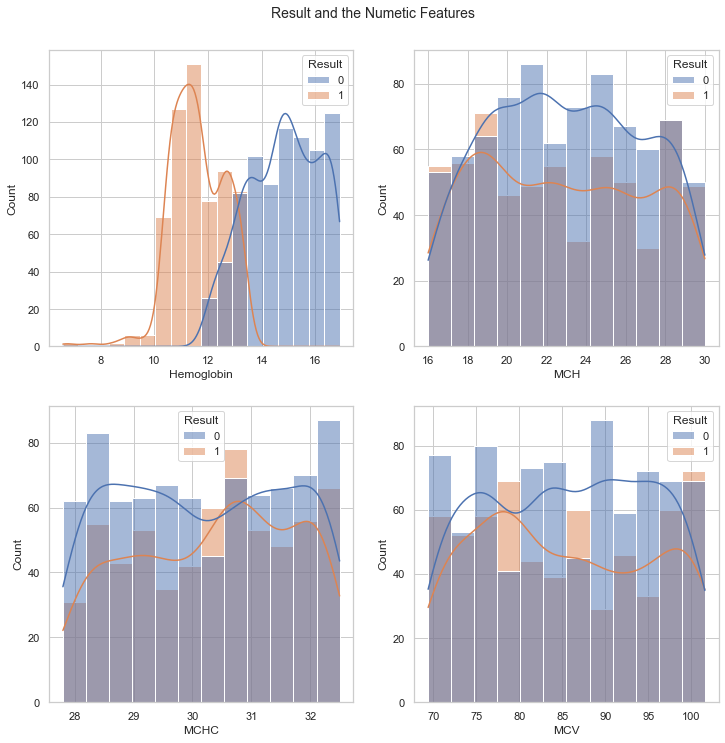

In [78]:
# Let's try to findout the relation between the Result and the numeric features

fig, ax = plt.subplots(2, 2, figsize=(12, 12))
sb.histplot(data=df, x=df['Hemoglobin'], hue=df['Result'], kde=True, ax=ax[0,0])
sb.histplot(data=df, x=df['MCH'], hue=df['Result'], kde=True, ax=ax[0,1])
sb.histplot(data=df, x=df['MCHC'], hue=df['Result'], kde=True, ax=ax[1,0])
sb.histplot(data=df, x=df['MCV'], hue=df['Result'], kde=True, ax=ax[1,1])
fig.suptitle('Result and the Numetic Features', fontsize=14, y=0.93)
plt.show()

It's hard to tell if a person has anemia by just looking at the MCH, MCHC and MCV levels. On the other hand, it's easier to deduce it by checking the Hemoglobin values.

## Test Dataset

It is for smoke test that we can use to see if we messed up and to give us confidence on our estimates of accuracy on unseen data. We will use 80% of the dataset for modeling and hold back 20% for validation.

In [56]:
x = df.drop('Result', axis=1)
y = df['Result']
test_size = 0.2
seed = 101
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)

## Evaluate Algorithms

- Linear Algorithms
- Non-linear Algorithms

In [81]:
# Test options and evaluation metrics
fold = 10
scoring = 'accuracy'

In [95]:
# Define the function
def evaluate_algorithms(x, y):
    models = []
    models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
    models.append(('LDA', LinearDiscriminantAnalysis()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('CART', DecisionTreeClassifier()))
    models.append(('NB', GaussianNB()))
    models.append(('SVM', SVC(gamma='auto')))
    
    results = []
    names = []
    for name, model in models:
        kfold = KFold(n_splits=fold, random_state=seed, shuffle=True)
        cv_results = cross_val_score(model, x, y, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = '%s: %f STD(%f)' % (name, cv_results.mean(), cv_results.std())
        print(msg)
    
    # Plot the results
    fig = plt.figure(figsize=(8,8))
    fig.suptitle('Algorithm Comparison', fontsize=14, y=0.93)
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()

LR: 0.946289 STD(0.016520)
LDA: 0.956901 STD(0.018542)
KNN: 0.879390 STD(0.038074)
CART: 1.000000 STD(0.000000)
NB: 0.936640 STD(0.021050)
SVM: 0.972722 STD(0.010739)


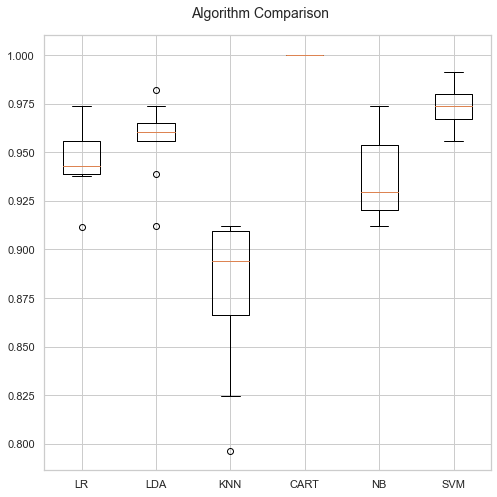

In [96]:
evaluate_algorithms(x_train, y_train)

Decision Tree Classifier provides the best accuracy score among the other alogrithms. It's accuracy score is 100% with the current features. That's why there is no need for feature selection, scale the input parameters or tune the hyperparameters.

## Finalize the Model

### Train the Model

In [101]:
cart = DecisionTreeClassifier()
cart.fit(x_train, y_train)

DecisionTreeClassifier()

### Predict using the trained Model

In [105]:
predictions = cart.predict(x_test)
print('Accuracy Score: %.2f%%\n' % (accuracy_score(y_test, predictions)*100))
print(classification_report(y_test, predictions))

Accuracy Score: 100.00%

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       163
           1       1.00      1.00      1.00       122

    accuracy                           1.00       285
   macro avg       1.00      1.00      1.00       285
weighted avg       1.00      1.00      1.00       285



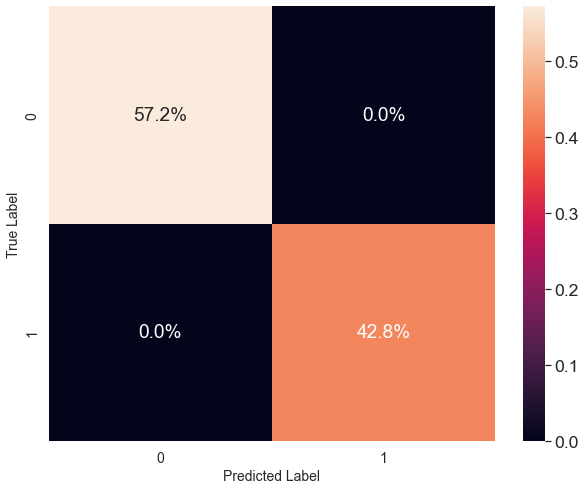

In [100]:
# Plot the confusion matrix
cf_matrix = confusion_matrix(y_test, predictions)
fig = plt.subplots(figsize=(10, 8))
sb.set(font_scale=1.6)
sb.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.1%')
plt.xlabel('Predicted Label', fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.yticks(fontsize=14)
plt.show()